# ARIMA Model for stock price prediction (Short Term)

RMSE: 2.83


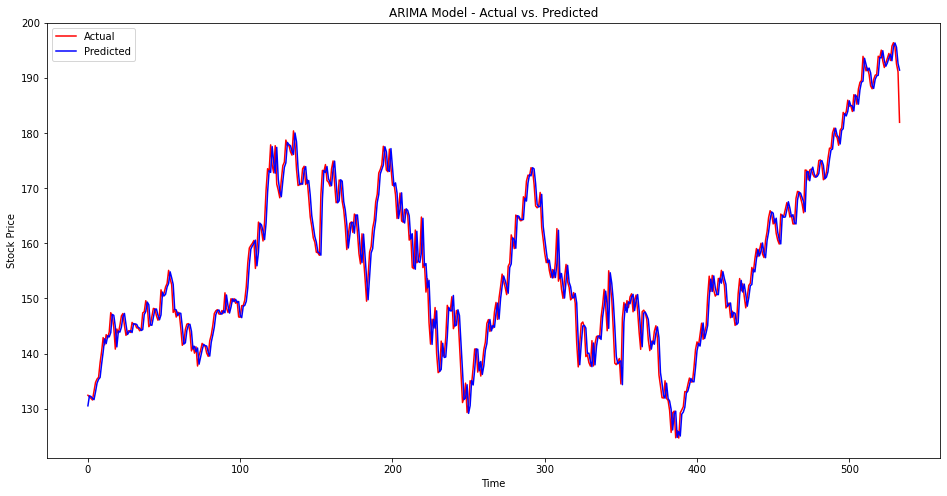

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2013-01-01')

# Selecting the 'Close' column for prediction
data = df['Close'].values

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to fit ARIMA model and make predictions
def fit_arima(train_data, order):
    history = [x for x in train_data]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return predictions

# Define the order for ARIMA model (p, d, q) (5, 1, 0)
p, d, q = 5, 1, 0

# Fit ARIMA model and make predictions
predictions = fit_arima(train, (p, d, q))

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test, color='red', label='Actual')
plt.plot(predictions, color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


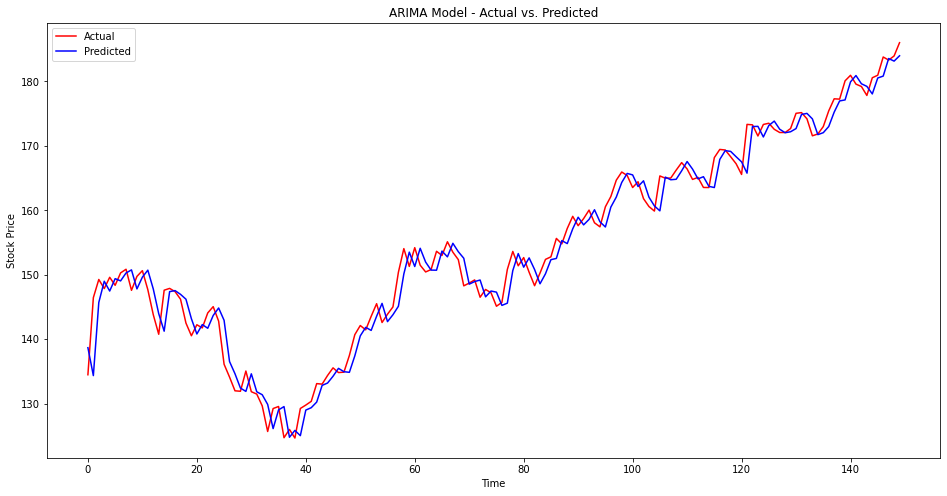

In [2]:
# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test[350:500], color='red', label='Actual')
plt.plot(predictions[350:500], color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

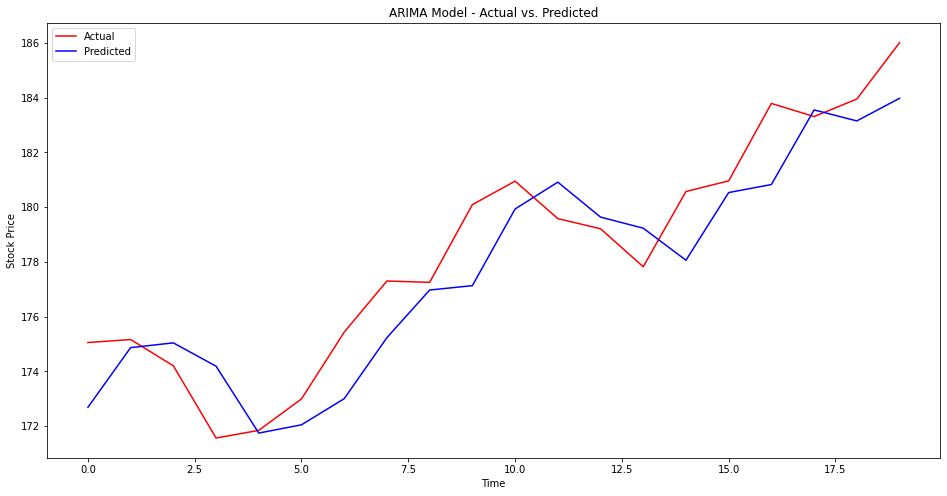

In [3]:
# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test[480:500], color='red', label='Actual')
plt.plot(predictions[480:500], color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

RMSE: 44.79


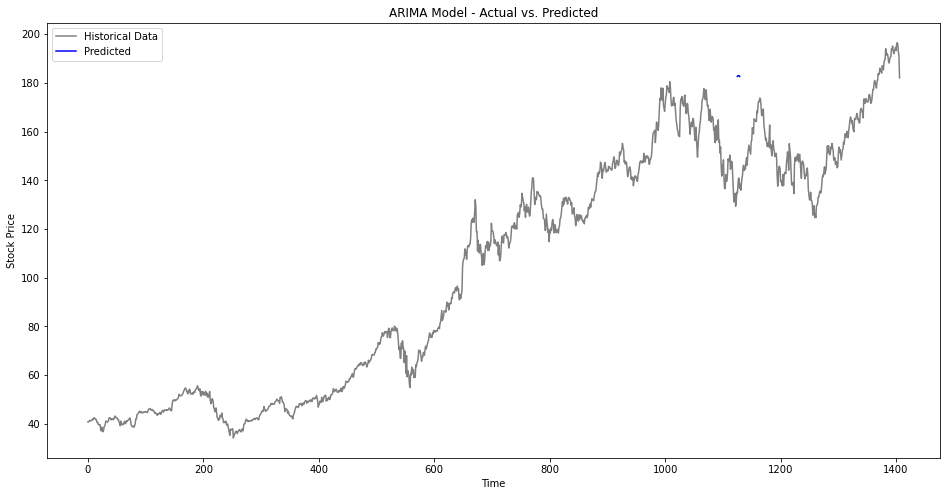

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2018-01-01')

# Selecting the 'Close' column for prediction
data = df['Close'].values

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to fit ARIMA model and make predictions
def fit_arima(train_data, order, forecast_steps):
    history = [x for x in train_data]
    predictions = []
    for t in range(forecast_steps):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(yhat)
    return predictions

# Define the order for ARIMA model (p, d, q) (5, 1, 0)
p, d, q = 5, 1, 0

# Number of steps to forecast (1 week, assuming 5 trading days in a week)
forecast_steps = 5

# Fit ARIMA model and make predictions for the next week
predictions = fit_arima(data, (p, d, q), forecast_steps)

# Calculate Root Mean Squared Error (RMSE) on the test set
train, test = data[:train_size], data[train_size:]
mse = mean_squared_error(test[:forecast_steps], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(data, color='gray', label='Historical Data')
plt.plot(np.arange(train_size, train_size + forecast_steps), predictions, color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
